# Explore here

In [5]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function
#con_str = "postgresql://gitpod:postgres:@localhost/milser_pg"
global engine # This allows us to use a global variable called engine
# A "connection string" is basically a string containing all database credentials together.
#connection_string = f"dbname={os.getenv('DB_NAME')} user={os.getenv('DB_USER')} password={os.getenv('DB_PASSWORD')} host={os.getenv('DB_HOST')}"

#engine = create_engine(connection_string)
#Session = sessionmaker(bind=engine,autocommit=False) 

# Ruta del directorio del script
#script_dir = os.path.dirname(__file__)  # Obtiene la ruta del directorio actual del script
cwd = '%pwd'
script_dir = os.path.abspath(cwd)
# Construir la ruta al archivo CSV
relative_path = os.path.join("data", "raw", "AB_NYC_2019.csv")
absolute_path = os.path.abspath(os.path.join(script_dir, relative_path))
#path=("../../Proyecto-de-Preprocesamiento-de-Datos/data/raw/AB_NYC_2019")

# Leer el archivo CSV
total_data_raw = pd.read_csv(r"C:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\data\raw\bank-marketing-campaign-data.csv",delimiter=';')
clean_data = total_data_raw
total_data_raw.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
clean_data.shape

(41188, 21)

El dataset tiene 41188 instanias con 21 variables, de estas vamosa a centrarnos en Y que utilizaremos para determinar el exito que ha tenido un apartamento.

#### Limpieza de datos

In [7]:
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
clean_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No hay valores nulos, por lo que no desechamos ninguna fila por este motivo.

In [9]:
#clean_data.drop("host_id", axis = 1).duplicated().sum()

clean_data.drop(["pdays","poutcome"], axis = 1, inplace = True)
clean_data.head()
#clean_data['education'].value_counts()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no


Asumo que no hay dupolicados porque cada linea es una solicitud distinta, aunque sea de un mismo cliente

In [10]:

def save_duplicates_to_excel(data, columns, folder_path):
    for column in columns:
        # Seleccionar la columna actual y su correspondiente con la terminación '_n'
        current_column = column
        numeric_column = f"{column}_n"

        data[numeric_column] = pd.factorize(data[column])[0]
        # Convertir la columna numérica a tipo decimal
        data[numeric_column] = data[numeric_column].astype(float)

        # Guardar los datos únicos en un DataFrame y luego escribirlos en un archivo Excel
        unique_data = data.drop_duplicates([column, numeric_column])[[column, numeric_column]]
        file_path = folder_path + f"\\{column}.xlsx"
        unique_data.to_excel(file_path, index=False)

non_numeric_columns = clean_data.select_dtypes(exclude=['number']).columns.tolist()
printable_columns = clean_data.columns.difference(non_numeric_columns)
printable_columns

#Selecciono las columnas que tienen algo no numerico, por lo que querremos categorizarlo
non_numeric_columns = total_data_raw.select_dtypes(exclude=['number']).columns.tolist()
#Estas columnas son las que tienen SOLO numeros
printable_columns = total_data_raw.columns.difference(non_numeric_columns)

columns = non_numeric_columns
folder_path = r"C:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\data\raw"
# Llamar a la función para guardar los datos únicos en archivos Excel
save_duplicates_to_excel(clean_data, columns, folder_path)
clean_data.head(50).to_excel(r"C:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\data\raw\with_factors.xlsx", index = False)


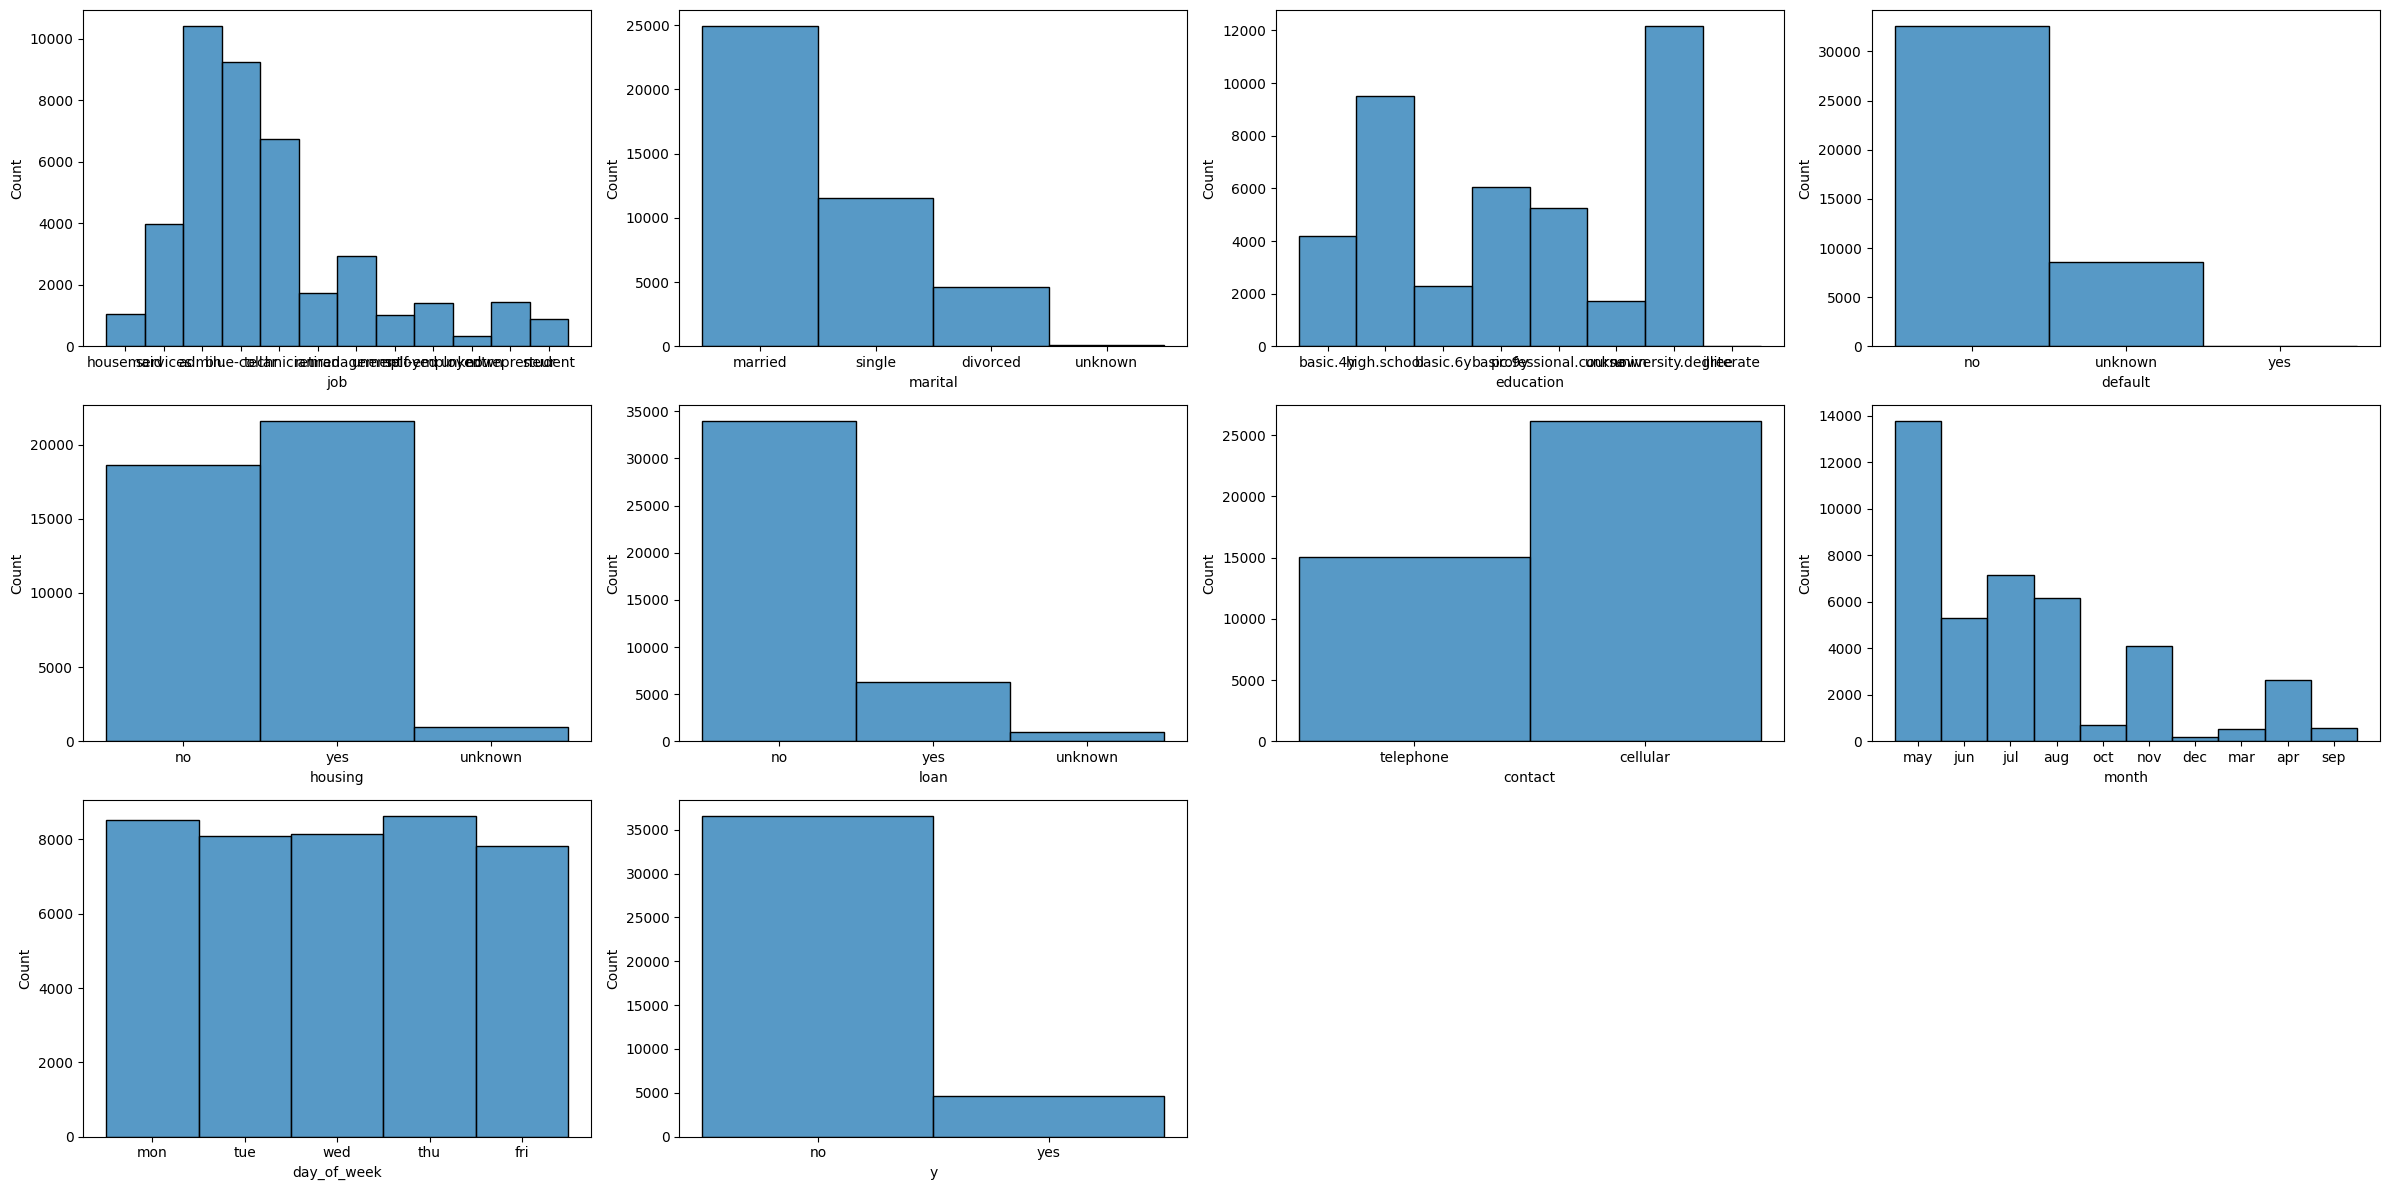

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

non_numeric_columns = total_data_raw.select_dtypes(exclude=['number']).columns.tolist()

def plot_histplots(clean_data, columns):
    num_plots = len(columns)
    n = int(np.ceil(np.sqrt(num_plots)))  # Calcular el número de filas y columnas necesarias
    m = (num_plots + n - 1) // n  # Calcular el número de filas necesarias para acomodar todos los gráficos
    fig, axes = plt.subplots(m, n, figsize=(6*n, 4*m))  # Crear la figura y los ejes

    for i, column in enumerate(columns):
        row = i // n
        col = i % n
        sns.histplot(clean_data, x=column, ax=axes[row, col])  # Dibujar histplot en el eje correspondiente

     #Rellenar los huecos vacíos
    for i in range(num_plots, m*n):
        row = i // n
        col = i % n
        axes[row, col].axis('off')

    plt.tight_layout()  # Ajustar el diseño para que no haya superposición

# Ejemplo de uso:
columns_to_plot = non_numeric_columns  # Lista de columnas que deseas representar
plot_histplots(clean_data, columns_to_plot)
plt.show()

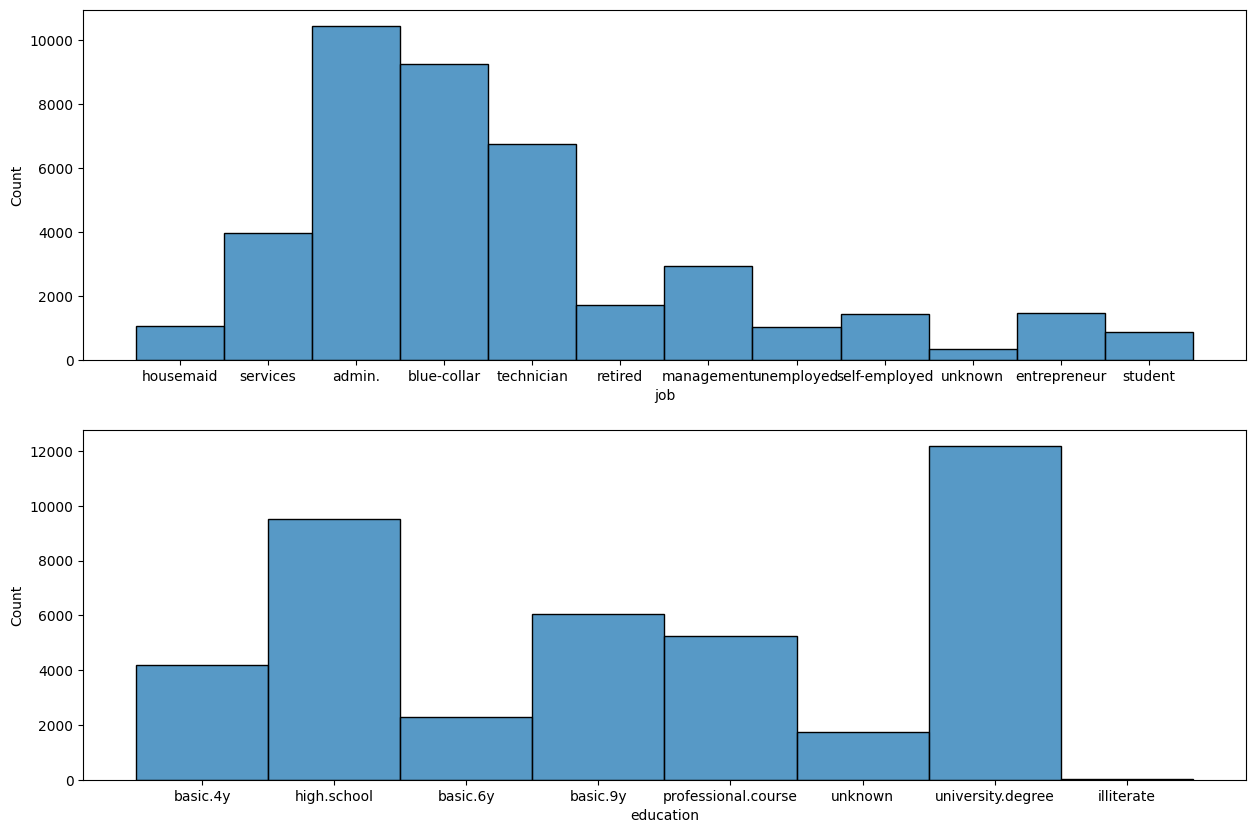

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,1, figsize = (15, 10))

sns.histplot(clean_data, x = "job", ax = axis[0])
sns.histplot(clean_data, x = "education", ax = axis[1])


plt.show()

##### Graficos categoricos

Aqui podemos ver como 


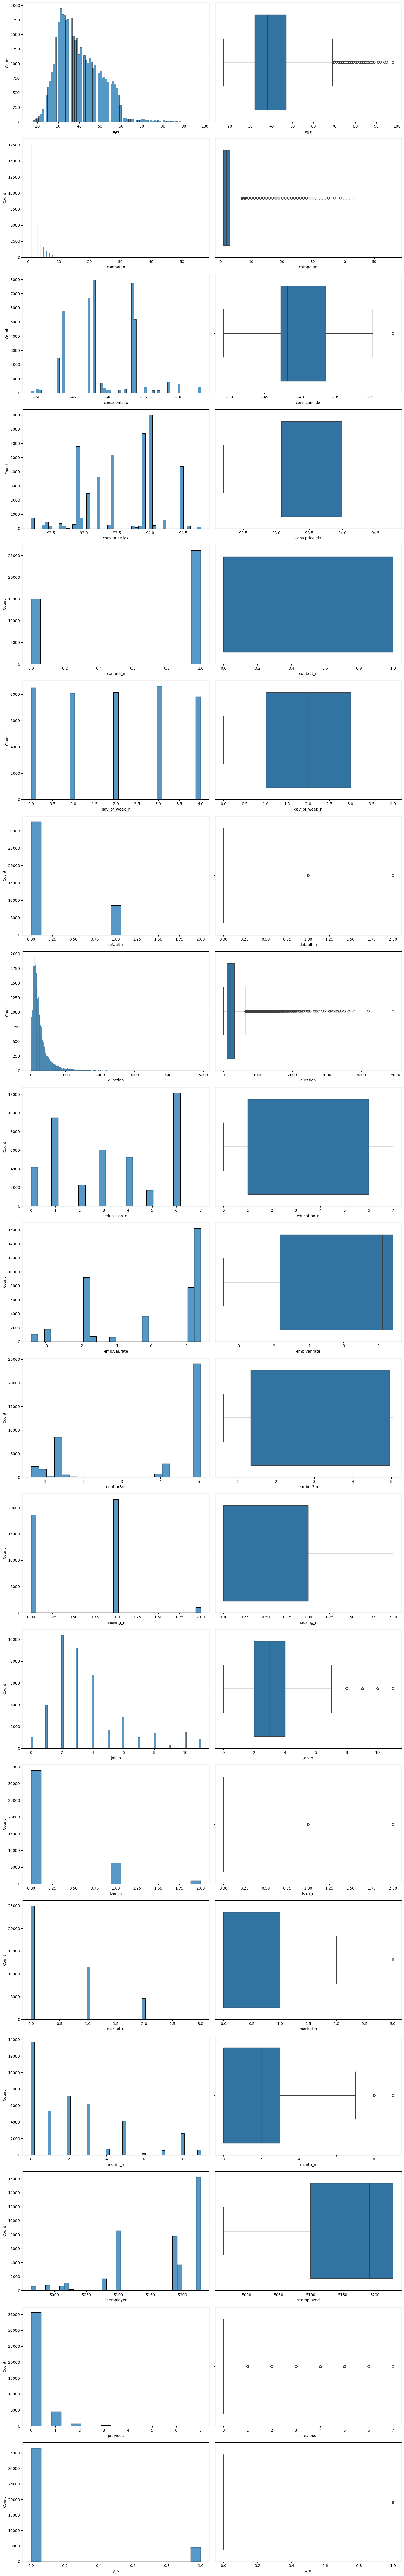

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = total_data_raw.columns.difference(non_numeric_columns)
def plot_hist_box_pairs(clean_data, columns):
    num_plots = len(columns)
    num_rows = num_plots  # Cada par de gráficos se representará en una fila
    num_cols = 2  # Cada fila tendrá un histograma y un boxplot

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, column in enumerate(columns):
        row = i
        col = 0  # Para cada par de gráficos, el histograma estará en la primera columna
        sns.histplot(clean_data, x=column, ax=axes[row, col])

        col = 1  # El boxplot estará en la segunda columna
        sns.boxplot(clean_data, x=column, ax=axes[row, col])

    plt.tight_layout()  # Ajustar el diseño para que no haya superposición

# Ejemplo de uso:
columns_to_plot = numeric_columns  # Lista de columnas que deseas representar
plot_hist_box_pairs(clean_data, columns_to_plot)
plt.show()

In [14]:
clean_data['y_n'].value_counts()

y_n
0.0    36548
1.0     4640
Name: count, dtype: int64

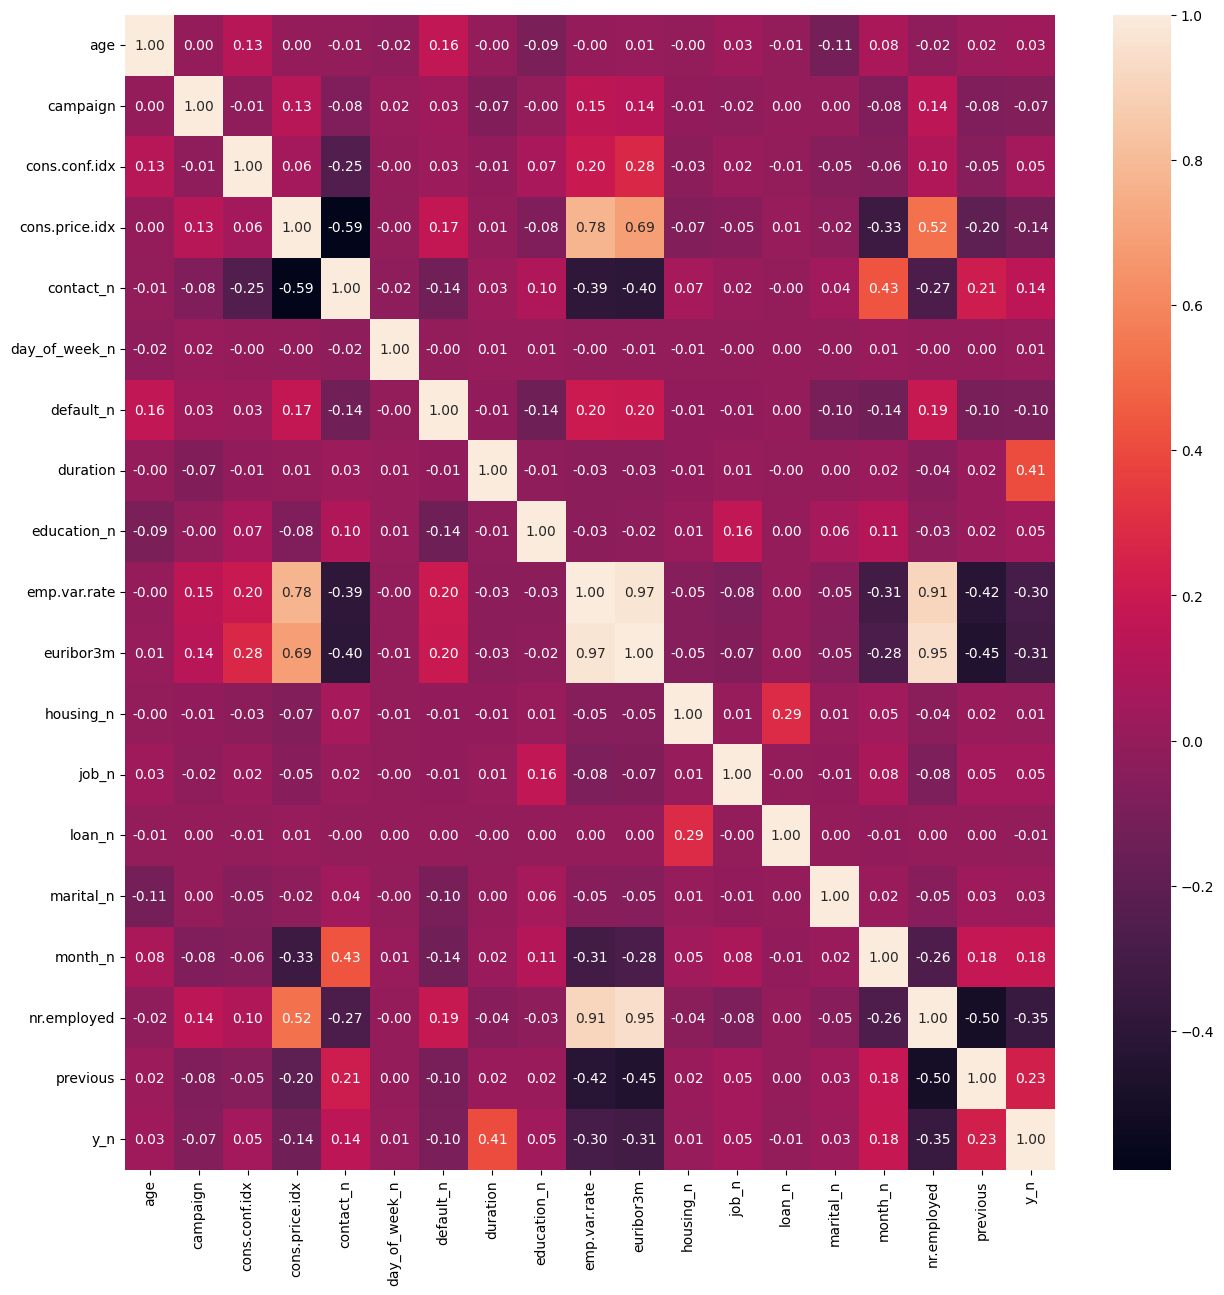

In [15]:
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(clean_data[clean_data.columns.difference(non_numeric_columns)].corr(), annot = True, fmt = ".2f")

plt.show()

In [16]:
clean_total_data = clean_data

### DAY 2
#### Outlayers
##### Reemplazar





Reemplazo las que tienen contenidos fuera de sus medias y les meto la moda para que no afecten 

In [17]:
descr_price = clean_data.y_n.describe()
descr_price

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_n, dtype: float64

In [18]:
price_iqr = descr_price["75%"]-descr_price["25%"]
uper_l = descr_price["75%"]
lower_l = descr_price["25%"]


##### Mantener

In [19]:
clean_data.isnull().sum()



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
y_n               0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

target = 'y_n'
predictoras = clean_data.columns.difference(non_numeric_columns + [target])

X = clean_data[predictoras]
y = clean_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train

,age,campaign,cons.conf.idx,cons.price.idx,contact_n,day_of_week_n,default_n,duration,education_n,emp.var.rate,euribor3m,housing_n,job_n,loan_n,marital_n,month_n,nr.employed,previous
39075,29,3,-33.0,92.713,1.0,0.0,0.0,77,6.0,-3.0,0.709,0.0,2.0,0.0,0.0,6.0,5023.5,1
34855,29,4,-46.2,92.893,0.0,4.0,0.0,12,6.0,-1.8,1.250,0.0,4.0,0.0,1.0,0.0,5099.1,0
7107,45,2,-36.4,93.994,0.0,3.0,1.0,277,2.0,1.1,4.860,1.0,3.0,0.0,0.0,0.0,5191.0,0
31614,34,1,-46.2,92.893,1.0,3.0,0.0,70,6.0,-1.8,1.327,0.0,1.0,0.0,0.0,0.0,5099.1,1
34878,32,9,-46.2,92.893,1.0,4.0,0.0,1181,1.0,-1.8,1.250,0.0,2.0,0.0,1.0,0.0,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,2,-36.4,93.994,0.0,1.0,1.0,427,4.0,1.1,4.857,0.0,5.0,0.0,0.0,0.0,5191.0,0
11284,37,1,-41.8,94.465,0.0,3.0,0.0,288,6.0,1.4,4.961,0.0,6.0,0.0,0.0,1.0,5228.1,0
38158,35,1,-26.9,92.431,1.0,3.0,0.0,194,1.0,-3.4,0.754,1.0,2.0,0.0,0.0,4.0,5017.5,1
860,40,2,-36.4,93.994,0.0,2.0,0.0,295,6.0,1.1,4.856,1.0,6.0,0.0,0.0,0.0,5191.0,0


Normalizadas

In [21]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)
X_train_norm.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact_n,day_of_week_n,default_n,duration,education_n,emp.var.rate,euribor3m,housing_n,job_n,loan_n,marital_n,month_n,nr.employed,previous
39075,-1.053709,0.154139,1.621455,-1.490923,0.756382,-1.407216,-0.511562,-0.695116,1.244714,-1.962634,-1.678565,-1.056690,-0.676665,-0.4394,-0.737196,1.543705,-1.978346,1.673800
34855,-1.053709,0.517478,-1.226575,-1.180409,-1.322083,1.428361,-0.511562,-0.944916,1.244714,-1.198766,-1.366780,-1.056690,0.136292,-0.4394,0.699960,-0.931494,-0.936182,-0.349144
7107,0.477399,-0.209199,0.887871,0.718902,-1.322083,0.719467,1.953150,0.073498,-0.583331,0.647250,0.713705,0.787018,-0.270187,-0.4394,-0.737196,-0.931494,0.330682,-0.349144
31614,-0.575238,-0.572537,-1.226575,-1.180409,0.756382,0.719467,-0.511562,-0.722018,1.244714,-1.198766,-1.322404,-1.056690,-1.083144,-0.4394,-0.737196,-0.931494,-0.936182,1.673800
34878,-0.766626,2.334170,-1.226575,-1.180409,0.756382,1.428361,-0.511562,3.547637,-1.040342,-1.198766,-1.366780,-1.056690,-0.676665,-0.4394,0.699960,-0.931494,-0.936182,-0.349144


In [22]:
dump(scaler, open(r"C:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\data\sav\normal.sav", "wb"))


### Day 3

mutual_info_classif en lugar de el anove si las variables son categoricas.

In [23]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

selector_model = SelectKBest(mutual_info_classif, k = 10)
selector_model.fit(X_train, y_train)
best_variables = selector_model.get_support()
print("Mejores variables: ", best_variables)
X_train_sel = pd.DataFrame(selector_model.transform(X_train))

selected_columns = X_train.columns[best_variables]
print("Columnas seleccionadas:", selected_columns)

Mejores variables:  [False False  True  True  True False False  True False  True  True False
  True False False  True  True  True]
Columnas seleccionadas: Index(['cons.conf.idx', 'cons.price.idx', 'contact_n', 'duration',
       'emp.var.rate', 'euribor3m', 'job_n', 'month_n', 'nr.employed',
       'previous'],
      dtype='object')


### Optimizacion

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train_norm, y_train)

LogisticRegression()

In [25]:
y_train_pred = model.predict(X_train_norm)
print(y_train_pred)

[0. 0. 0. ... 0. 0. 0.]


In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.9064201727307413

grid


In [27]:
hyperp_dict = {
    "penalty": [None, 'l2', 'l1', 'elasticnet'],
    "dual": [True, False],
    "fit_intercept": [True, False],
    "max_iter": [5, 15, 50, 100],
    "n_jobs": [-1]  # Utiliza todos los núcleos de la CPU
}
hyperp_dict2 = {
    "penalty": [None, 'l2', 'l1', 'elasticnet'],
    "dual": [True, False],
    "fit_intercept": [True, False],
    "max_iter": [50, 100],
    "C": [0.001, 0.01, 0.1,],
    "solver": ['lbfgs', 'sag', 'saga'],
    "tol": [1e-4, 1e-3, 1e-2],
    "n_jobs": [-1]  # Utiliza todos los núcleos de la CPU
}


from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyperp_dict2, scoring = "accuracy", cv = 10)
grid2 = GridSearchCV(model, hyperp_dict, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [50, 100],
                         'n_jobs': [-1],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [28]:
grid.fit(X_train_norm, y_train)

C:\Users\milser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\milser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\milser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\milser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: U

KeyboardInterrupt: 

In [ ]:
grid.best_estimator_

NameError: name 'grid' is not defined

In [ ]:
grid.best_params_

{'dual': False,
 'fit_intercept': True,
 'max_iter': 50,
 'n_jobs': -1,
 'penalty': 'l2'}

In [ ]:
accuracy_score(y_train, LogisticRegression(max_iter = 500).fit(X_train_norm, y_train).predict(X_train_norm))

NameError: name 'accuracy_score' is not defined

In [ ]:
y_train_pred = grid.best_estimator_.predict(X_train_norm)
accuracy_score(y_train, y_train_pred)

0.9064201727307413